### Plotting with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-colorblind')

In [4]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2021', periods=365))
df.head()

A          B          C
2021-01-01 -1.085631  20.059291 -20.230904
2021-01-02 -0.088285  21.803332 -16.659325
2021-01-03  0.194693  20.835588 -17.055481
2021-01-04 -1.311601  21.255156 -17.093802
2021-01-05 -1.890202  21.462083 -19.518638

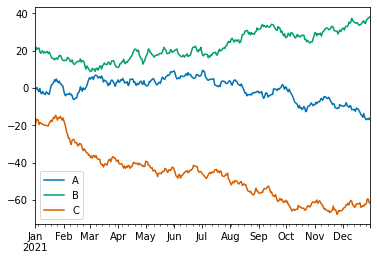

In [5]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output
plt.show()

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

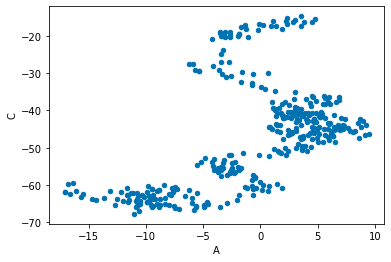

In [6]:
df.plot.scatter('A',"C")
plt.show()

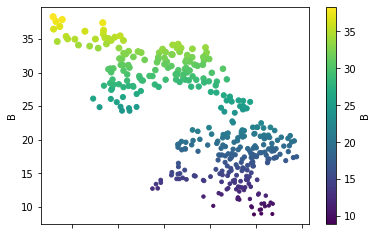

In [7]:
# create a scatter plot of columns 'A' and 'B', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'B', c='B', s= df['B'], colormap='viridis')
plt.show()

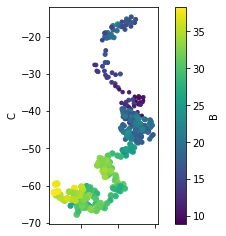

In [8]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

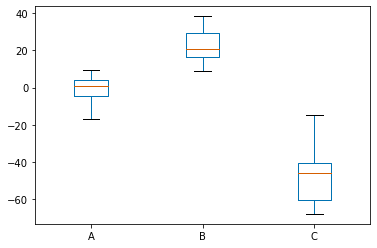

In [9]:
df.plot.box();

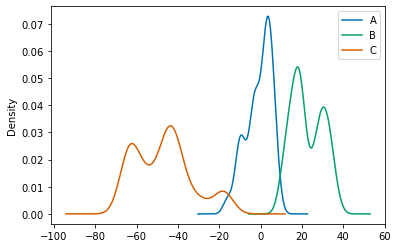

In [10]:
df.plot.kde()
plt.show()

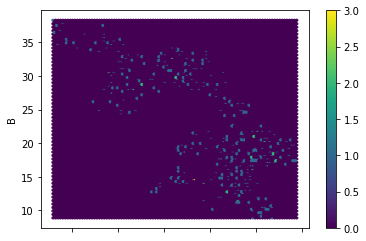

In [11]:
df.plot.hexbin("A", 'B',colormap='viridis' )
plt.show()

### pandas.tools.plotting

In [12]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head(3)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

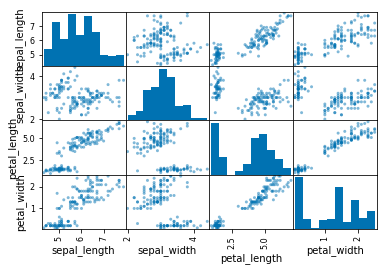

In [13]:
pd.plotting.scatter_matrix(df); # 산점도 행렬 

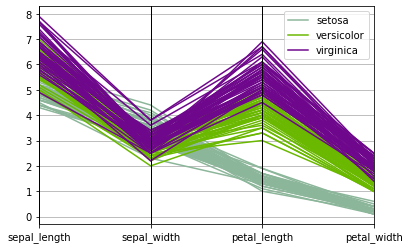

In [14]:
# 판다스는 평행 좌표 plot 만드는 plotting 도구를 포함 
# plotting parllel 고차원 다변수 데이터를 시각화하는 일반적인 방법 
plt.figure()
pd.plotting.parallel_coordinates(df, "species");

### Seaborn

In [15]:
import seaborn as sns

In [16]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')
v3 = np.concatenate((v1,v2))

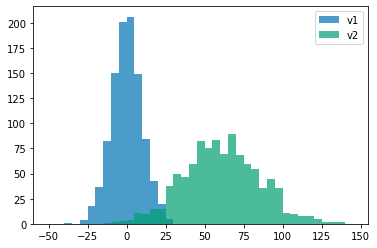

In [17]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

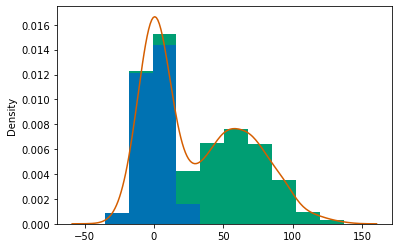

In [18]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked',density= True);
sns.kdeplot(v3);

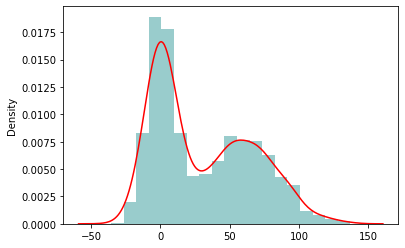

In [19]:
plt.figure() 
sns.distplot(v3 , hist_kws = {'color':'Teal'},  kde_kws = {'color':"Red"})
plt.show()

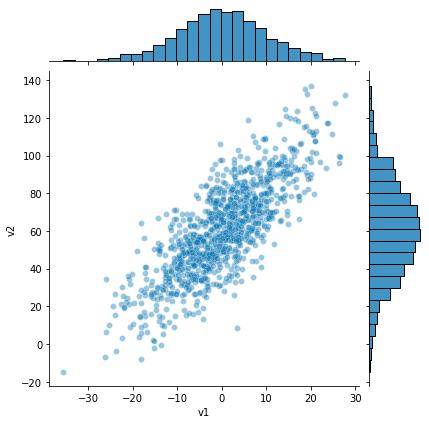

In [20]:
sns.jointplot(v1, v2, alpha=0.4);

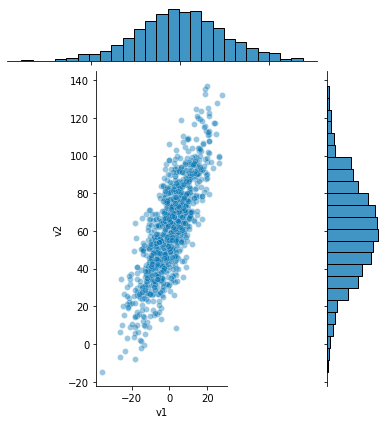

In [21]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

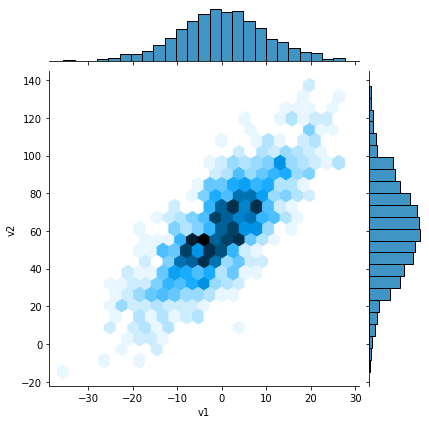

In [22]:
sns.jointplot(v1, v2, kind='hex');

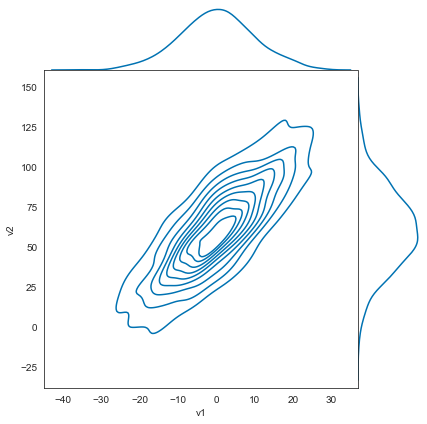

In [23]:
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

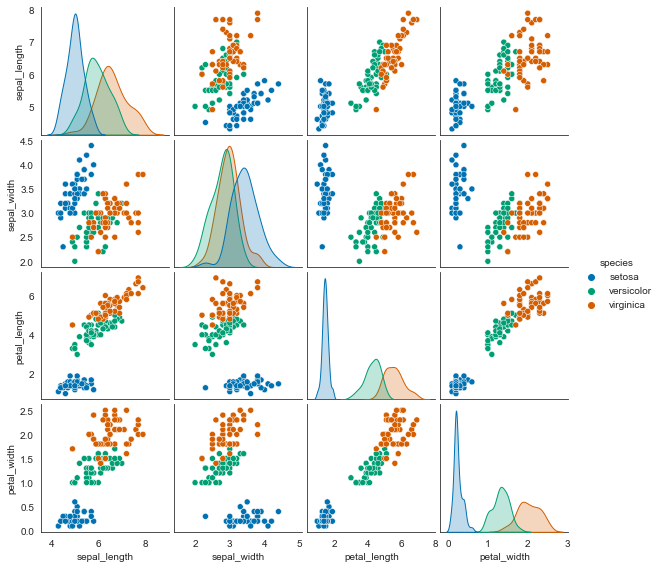

In [24]:
sns.pairplot(df, hue='species', diag_kind='kde', size=2);

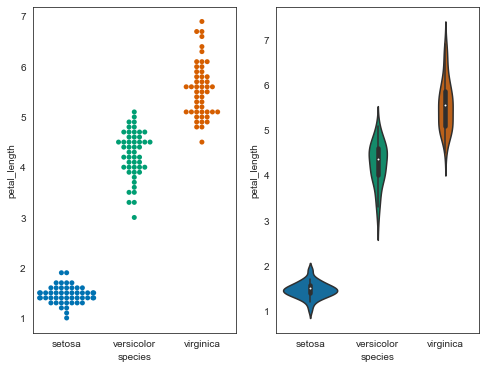

In [25]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('species', 'petal_length', data=df);
plt.subplot(122)
sns.violinplot('species', 'petal_length', data=df);